In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\navgurukul\Downloads\placement.csv")
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# Steps

* 0. Preprocess + EDA + Feature Selection
*  1. Extract input and output cols
*  2. Scale the values
*  3. Train test split
*  4. Train the model
* 5. Evaluate the model/model selection
* 6. Deploy the model

In [5]:
data.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
data.sample(5)

,Unnamed: 0,cgpa,iq,placement
41,41,5.4,114.0,0
21,21,7.1,151.0,1
43,43,6.8,141.0,1
69,69,8.5,120.0,1
31,31,3.9,109.0,0


In [9]:
data.drop(columns="Unnamed: 0",inplace=True)

In [10]:
data.head(3)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
data.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [15]:
data.duplicated().sum()

0

<Axes: xlabel='cgpa', ylabel='iq'>

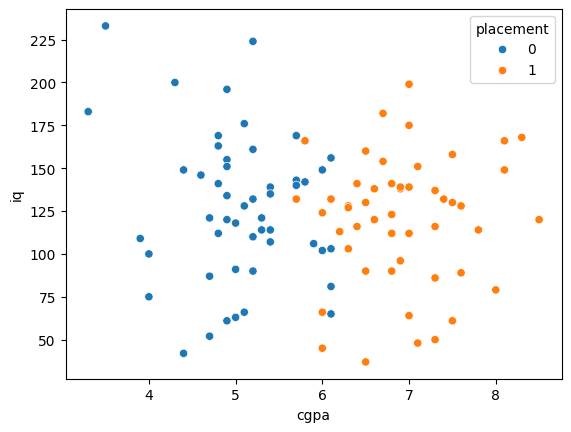

In [19]:
sns.scatterplot(data=data,x="cgpa",y="iq",hue="placement")

In [20]:
# correlation

correlation = data['cgpa'].corr(data['iq'])
print("Correlation between CGPA and IQ:", correlation)

Correlation between CGPA and IQ: -0.0987906720582117


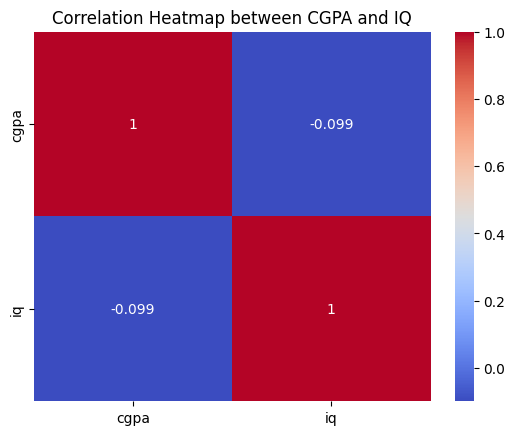

In [21]:
corr_matrix = data[['cgpa', 'iq']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between CGPA and IQ')
plt.show()

In [40]:
X=data.iloc[:,0:2]
Y=data.iloc[:,-1]

In [41]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [42]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
train_test_split(X,Y,test_size=0.1)

[    cgpa     iq
 24   4.7  121.0
 87   5.7  132.0
 97   6.7  182.0
 62   6.0  102.0
 10   6.0   45.0
 ..   ...    ...
 89   4.9  151.0
 2    5.3  121.0
 14   6.1  103.0
 90   7.3   86.0
 43   6.8  141.0
 
 [90 rows x 2 columns],
     cgpa     iq
 82   6.5   37.0
 37   8.1  149.0
 13   6.4  116.0
 45   6.0   66.0
 80   4.9  196.0
 84   5.7  169.0
 3    7.4  132.0
 58   8.0   79.0
 79   6.5   90.0
 48   6.6  138.0,
 24    0
 87    1
 97    1
 62    0
 10    1
      ..
 89    0
 2     0
 14    0
 90    1
 43    1
 Name: placement, Length: 90, dtype: int64,
 82    1
 37    1
 13    1
 45    1
 80    0
 84    0
 3     1
 58    1
 79    1
 48    1
 Name: placement, dtype: int64]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [45]:
x_train

,cgpa,iq
85,5.8,166.0
0,6.8,123.0
16,5.2,224.0
55,7.8,114.0
38,6.5,160.0
...,...,...
32,7.0,139.0
49,5.4,135.0
13,6.4,116.0
91,7.5,158.0


In [46]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
x_train=scaler.fit_transform(x_train)

In [48]:
x_train

array([[-0.19768906,  1.03604346],
       [ 0.70545893, -0.04906836],
       [-0.73957785,  2.49968265],
       [ 1.60860692, -0.27618479],
       [ 0.43451453,  0.8846325 ],
       [ 0.52482933,  0.32945902],
       [-0.01705946, -0.02383321],
       [ 1.42797732,  0.07710743],
       [ 0.70545893, -0.32665511],
       [ 0.70545893,  0.40516449],
       [-0.55894826, -0.27618479],
       [-0.92020745, -0.17524416],
       [ 0.88608853,  1.86880369],
       [-0.73957785,  0.90986766],
       [-1.46209625, -2.09311621],
       [ 0.97640333, -1.94170526],
       [ 0.52482933, -0.12477384],
       [-0.01705946, -1.4874724 ],
       [ 0.79577373,  0.32945902],
       [ 1.42797732, -0.90706376],
       [ 0.25388493, -0.55377154],
       [-1.10083705,  0.96033798],
       [ 0.25388493,  0.05187227],
       [-1.01052225,  0.65751608],
       [ 1.15703292,  0.30422386],
       [-0.28800386,  0.45563481],
       [-0.82989265,  0.07710743],
       [-1.01052225,  1.79309821],
       [ 0.97640333,

In [54]:
x_test = scaler.fit_transform(x_test)

In [55]:
x_test

array([[ 0.8541427 ,  0.71630772],
       [ 0.26507877, -0.78354237],
       [ 0.41234475,  0.43185339],
       [ 1.14867466, -1.58518639],
       [-0.39761815, -0.55080702],
       [-0.76578311,  0.250837  ],
       [-0.61851713,  1.13005946],
       [-0.76578311, -0.62838547],
       [-1.79664499,  1.85412502],
       [ 1.6641056 , -0.83526134]])

In [60]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [61]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [62]:
# evaluate model

clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
y_test

60    1
78    0
63    1
77    1
28    0
24    0
76    0
23    0
17    0
58    1
Name: placement, dtype: int64

In [65]:
# check accuracy

y_pred=clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

<Axes: >

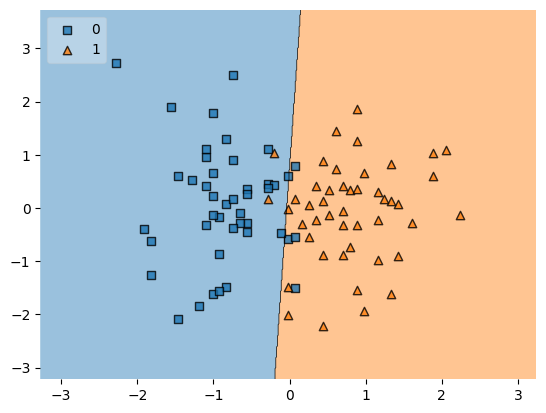

In [71]:
#check model

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [72]:
# Deploy the model

import pickle

In [73]:
pickle.dump(clf,open("model.pkl","wb"))